In [179]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Env     		:   grizli
@File    		:   ~/emulator/save_tp_and_bkg_hdf5.ipynb
@Time    		:   2023/07/13 16:23:18
@Author  		:   Run Wen
@Version 		:   1.0
@Contact 		:   wenrun@pmo.ac.cn
@Description	:   Updating the bkg spec and throughput fits file and the way to suit for each grism band grid.
                    Updating the functions for generating CSST grism intrinsic spectra and convolve with kernels based on wavelengths. 
                    Expanding the spectral resolution unit to pixel-based spectrum.
'''

import numpy as np
import math
import os
from tqdm import tqdm
import h5py
import pysynphot as S
from astropy.io import fits
from astropy.table import Table
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp1d

In [484]:
GUwavemin = 2450
GUwavemax = 4200
GVwavemin = 3800
GVwavemax = 6600
GIwavemin = 6000
GIwavemax = 10500
c = 2.9979e8 # m/s
c_aa = 2.9979e18 #AA/s
h = 6.626e-27 # erg*s
radi = 100 # cm
guRes = 241 #resolution of grism
gvRes = 263
giRes = 270
expt = 150 # exposure time
expnum = 4 # exposure number
colarea = np.pi*radi**2 # cm^2
def fnu2fphot(wave,fnu): return (fnu / (wave*h))
def flam2fnu(wave,flam): return (wave**2/c_aa)*flam

In [498]:
skyb_total = Table.read('/Users/rain/CSST/skyb/total1.csv')
bkg = h5py.File('/Users/rain/emulator/bkg_and_tp.hdf5', 'r')
bkgwave = np.hstack((2445,skyb_total['wavelength']*10))
bkgflam = np.hstack((skyb_total['intensity'][0]*1e-17,skyb_total['intensity']*1e-17))
bkgf = interpolate.interp1d(bkgwave,flam2fnu(bkgwave, bkgflam))

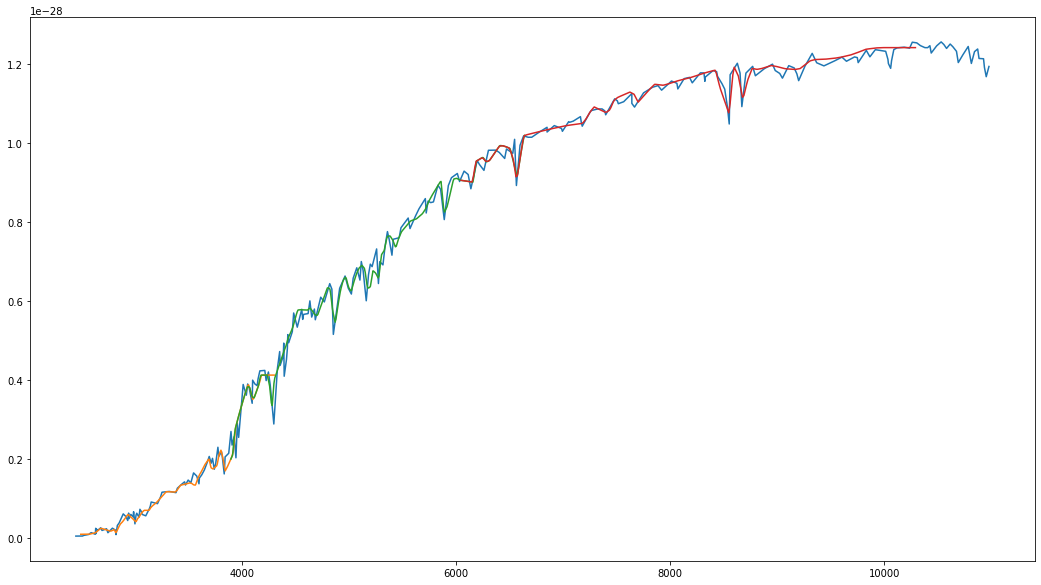

In [501]:
plt.plot(bkgwave,flam2fnu(bkgwave,bkgflam))
plt.plot(bkg['bkg_gu_wave'][:],bkg['bkg_gu_fnu_per_arcsec'][:])
plt.plot(bkg['bkg_gv_wave'][:],bkg['bkg_gv_fnu_per_arcsec'][:])
plt.plot(bkg['bkg_gi_wave'][:],bkg['bkg_gi_fnu_per_arcsec'][:])

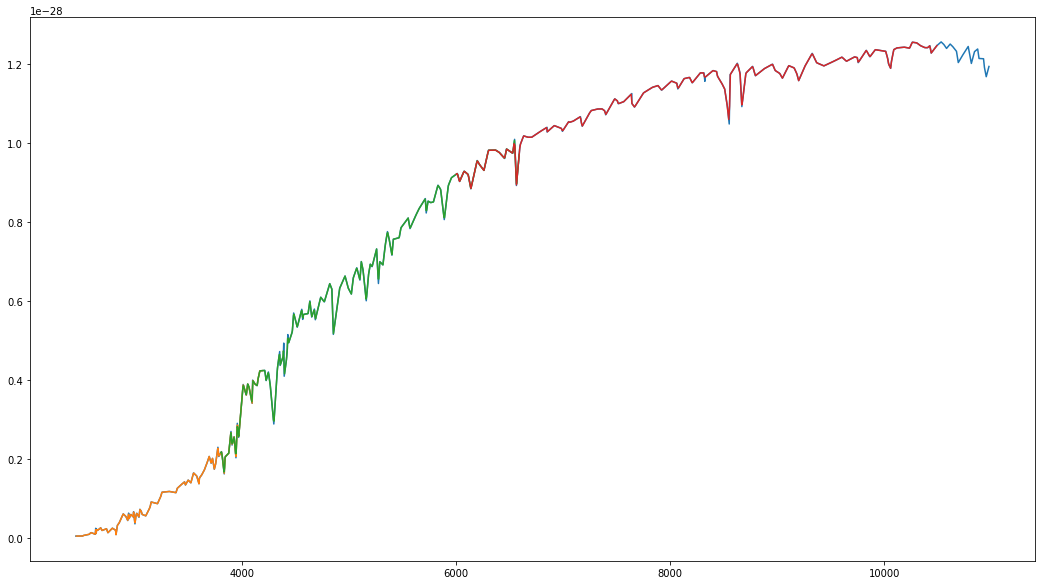

In [503]:
plt.plot(bkgwave,flam2fnu(bkgwave,bkgflam))
plt.plot(wave_gu,bkgf(wave_gu))
plt.plot(wave_gv,bkgf(wave_gv))
plt.plot(wave_gi,bkgf(wave_gi))

In [504]:
table = Table([bkgwave, bkgflam, flam2fnu(bkgwave,bkgflam)], names=('wavelength', 'flam', 'fnu'))
table.write('bkg_spec.fits', overwrite=True)

In [4]:
gutp = Table.read('GU.Throughput.1st.fits')
gvtp = Table.read('GV.Throughput.1st.fits')
gitp = Table.read('GI.Throughput.1st.fits')

In [21]:
thp_gu = interpolate.interp1d(gutp['WAVELENGTH'],gutp['SENSITIVITY'])
thp_gv = interpolate.interp1d(gvtp['WAVELENGTH'],gvtp['SENSITIVITY'])
thp_gi = interpolate.interp1d(gitp['WAVELENGTH'],gitp['SENSITIVITY'])

125


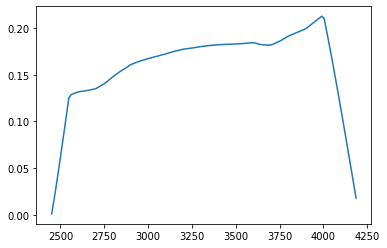

In [19]:
plt.plot(np.arange(GUwavemin,GUwavemax,14),(thp_gu(np.arange(GUwavemin,GUwavemax,14))))
print(len(np.arange(GUwavemin,GUwavemax,14)))

In [466]:
file1

<HDF5 file "seedcat2_0702_0_DECaLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5" (mode r)>

140


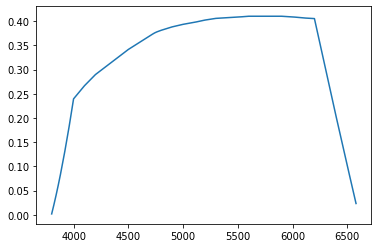

In [35]:
plt.plot(np.arange(GVwavemin,GVwavemax,20),(thp_gv(np.arange(GVwavemin,GVwavemax,20))))
print(len(np.arange(GVwavemin,GVwavemax,20)))

150


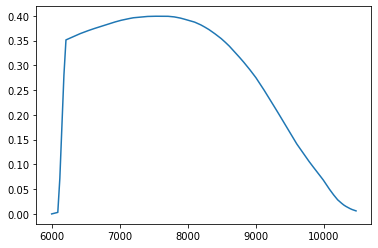

In [36]:
plt.plot(np.arange(GIwavemin,GIwavemax,30),(thp_gi(np.arange(GIwavemin,GIwavemax,30))))
print(len(np.arange(GIwavemin,GIwavemax,30)))

In [579]:
file1 = h5py.File('/Users/rain/emulator/seedcat_0702/seedcat2_0702_0_DECaLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5','r')
file2 = h5py.File('/Users/rain/emulator/seedcat_0702/seedcat2_0702_0_MzLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5','r')
file3 = h5py.File('/Users/rain/emulator/seedcat_0702/seedcat2_0420_1054_DECaLS_0csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8_10.hdf5','r')

In [41]:
for i in range(len(file1['best_fit']['wavelength_rest'][:])-1):
    print(file1['best_fit']['wavelength_rest'][i]/(file1['best_fit']['wavelength_rest'][i+1]-file1['best_fit']['wavelength_rest'][i]))

300.6670364805743
300.66703647935924
300.66703647935145
300.66703647934924
300.6670364793598
300.66703647935594
300.6670364793358
300.6670364793356
300.66703647936635
300.66703647935225
300.6670364793589
300.6670364793637
300.66703647933247
300.6670364793556
300.66703647933195
300.6670364793615
300.6670364793569
300.66703647935964
300.6670364793484
300.66703647936066
300.66703647933326
300.6670364793711
300.6670364793546
300.66703647933997
300.66703647934406
300.6670364793495
300.6670364793691
300.6670364793643
300.6670364793247
300.66703647935856
300.66703647935793
300.6670364793631
300.6670364793562
300.66703647932684
300.66703647936396
300.66703647935634
300.6670364793392
300.6670364793622
300.66703647934753
300.6670364793502
300.66703647936055
300.6670364793437
300.6670364793472
300.66703647937476
300.66703647934594
300.66703647935225
300.6670364793581
300.6670364793367
300.66703647936356
300.66703647933593
300.66703647936157
300.66703647933326
300.66703647935617
300.6670364793522


In [208]:
# 光谱分辨率
guRes = 241
# 计算分辨单元的宽度
gudlambda = (GUwavemin + GUwavemax) / 2 / guR
# 计算数组中元素的数量
guN = int((GUwavemax - GUwavemin) / gudlambda) + 1
# 创建波长数组
guwave = np.array([GUwavemin + i * gudlambda for i in range(guN)])
# for i in range(len(guwave)-1):
#     print(guwave[i]/(guwave[i+1]-guwave[i]))

In [209]:
# 光谱分辨率
gvRes = 263
# 计算分辨单元的宽度
gvdlambda = (GVwavemin + GVwavemax) / 2 / gvR
# 计算数组中元素的数量
gvN = int((GVwavemax - GVwavemin) / gvdlambda) + 1
# 创建波长数组
gvwave = np.array([GVwavemin + i * gvdlambda for i in range(gvN)])
# for i in range(len(gvwave)-1):
#     print(gvwave[i]/(gvwave[i+1]-gvwave[i]))

In [210]:
# 光谱分辨率
giRes = 270
# 计算分辨单元的宽度
gidlambda = (GIwavemin + GIwavemax) / 2 / giR
# 计算数组中元素的数量
giN = int((GIwavemax - GIwavemin) / gidlambda) + 1
# 创建波长数组
giwave = np.array([GIwavemin + i * gidlambda for i in range(giN)])
# for i in range(len(giwave)-1):
#     print(giwave[i]/(giwave[i+1]-giwave[i]))

In [72]:
print(len(guwave)*4)
print(len(gvwave)*4)
print(len(giwave)*4)

508
568
592


In [613]:
def sls_wave_spec(highres_wave,highres_flux,redshift,grism):
    """ 
    Generate CSST intrinsic spectra with CSST grsim resolution and corresponding length.

    parameters:
    ----------
    highres_wave - wavelength array for the input catalog, one single array, [2079,] - [array]
    highres_flux - flux array for the input catalog, arrays, [10000+, 2079]  - [array]
    redshift - redshift array for the input catalog, one single array, [10000+,] - [array]
    grism - CSST grism bands, in 'GU', 'GV', and 'GI' - [string]

    return:
    ------
    spectral_unit_wavelength - CSST grism wavelength grid in spectral units (length = 100+), arrays, [100+, ] - [array]
    spectral_unit_flux - CSST grism grid flux in spectral units (length = 100+), arrays, [10000+, 100+] - [array]

    """
    # 根据输入的字符串参数来确定变量的赋值
    if grism == 'GU':
        R = guRes
        start_wl = GUwavemin
        end_wl = GUwavemax
    elif grism == 'GV':
        R = gvRes
        start_wl = GVwavemin
        end_wl = GVwavemax
    elif grism == 'GI':
        R = giRes
        start_wl = GIwavemin
        end_wl = GIwavemax
    else:
        raise ValueError('Invalid grism, please input GU, GV, or GI.')

    center_wl = (start_wl + end_wl) / 2
    # calculating the mean delta lambda
    delta_lambda = center_wl / R
    # obtain the numbers of spectral resolution units based on mean delta lambda
    N = int((end_wl - start_wl) / delta_lambda) + 1
    # generate an array for spectral resolution unit based on the grism resolution in the corresponding wavelength range
    spectral_unit_wavelength = np.array([start_wl + i * delta_lambda for i in range(N)])
    # calculating observed wavelength
    
    mask = (redshift[:]  > 0) & (redshift[:]  < 10) # there are problems in some source DESI phot catalog, see problem 1 in errors.log
    redshift = redshift[mask]
    highres_flux = highres_flux[:][mask]
    wave_obs = np.ones_like(highres_flux)

    for i in (range(len(wave_obs))):
        wave_obs[i] = highres_wave * (1+redshift[i])
    grism_wave_list = []
    grism_flux_list = []
    for i in (range(len(wave_obs))):
        grism_wave_list.append(wave_obs[i][np.where( (wave_obs[i] >= start_wl) & (wave_obs[i] <= end_wl) )])
        grism_flux_list.append(highres_flux[i][np.where( (wave_obs[i] >= start_wl) & (wave_obs[i] <= end_wl) )])
    grism_wave_array = np.array(grism_wave_list, dtype=object) # data array in [xxxxx]
    grism_flux_array = np.array(grism_flux_list, dtype=object) # data array in [xxxxx,xxx]

    spectral_unit_flux = np.ones((len(grism_flux_array),len(spectral_unit_wavelength)))
    for i in range(len(spectral_unit_flux)):
        spectral_unit_flux[i] = np.interp(spectral_unit_wavelength, grism_wave_array[i], grism_flux_array[i])
    return spectral_unit_wavelength, spectral_unit_flux, mask

In [302]:
spectral_unit_wavelength, spectral_unit_flux = sls_wave_spec(file1['best_fit']['wavelength_rest'][:]*1e4, file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'], file1['best_fit']['z'], 'GI')

In [614]:
spectral_unit_wavelength3, spectral_unit_flux3, mask = sls_wave_spec(file3['best_fit']['wavelength_rest'][:]*1e4, file3['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'], file3['best_fit']['z'], 'GI')

In [621]:
file3['parameters'][:,14][mask]

array([245.522  , 223.149  ,  17.3859 , ...,   5.15513, 184.91   ,
        32.9114 ])

In [583]:
file3['best_fit']['wavelength_rest'][:]*1e4

array([  100.16602089,   100.49916689,   100.83342091, ...,
       99170.96969087, 99501.69873445, 99833.53073891])

In [589]:
len(file3['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][:])

76661

In [610]:
len(spectral_unit_flux3)

76660

In [591]:
file3['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][0]

array([0.0100166 , 0.01004992, 0.01008334, ..., 9.91709697, 9.95016987,
       9.98335307])

In [601]:
file3['ID'][0]

b'0'

In [599]:
(file3['best_fit']['z'][:]).max()

1.1586360902464882e+108

In [279]:
spectral_unit_flux

array([[   2.56271705,    2.58499373,    2.62087639, ...,   23.66353671,
          23.66021855,   23.68448441],
       [ 172.54404813,  166.3825109 ,  184.35215558, ...,  356.8248929 ,
         354.14466789,  349.1772789 ],
       [  16.14941942,   16.36211016,   20.14103313, ...,   95.42499881,
          95.49605118,   97.18892199],
       ...,
       [ 112.29161399,  165.7800947 ,  168.44334586, ...,  371.70004801,
         369.11124754,  334.26354179],
       [ 856.28168069,  876.69373542,  894.64384255, ..., 1689.65757952,
        1691.73638107, 1693.98787044],
       [ 120.59814732,  128.21571916,  129.0857382 , ...,  126.5222282 ,
         118.74289148,  115.18307573]])

In [447]:
from astropy.convolution import Gaussian1DKernel,convolve
def odd(value):
    """
    Detect the value whether it is an odd, if not, return an odd number. 

    parameters
    ----------
    value - the number to be test for whether odd - [float]

    return
    ------
    i - an odd number - [int]
    """
    i = math.ceil(value)
    if i % 2 == 0: return i +1
    else: return i
def kernels_convolve(highres_wave,highres_flux,redshift,grism):
    """ 
    Generate CSST intrinsic spectra with CSST grsim resolution and corresponding length.

    features:
    --------
    Using astropy.convolve package to 
    parameters:
    ----------
    highres_wave - wavelength array for the input catalog, one single array, [2079,] - [array]
    highres_flux - flux array for the input catalog, arrays, [10000+, 2079]  - [array]
    redshift - redshift array for the input catalog, one single array, [10000+,] - [array]
    grism - CSST grism bands, in 'GU', 'GV', and 'GI' - [string]

    return:
    ------
    spectral_unit_wavelength - CSST grism wavelength grid in spectral units (length = 100+), arrays, [100+, ] - [array]
    spectral_unit_flux - CSST grism grid flux in spectral units (length = 100+), arrays, [10000+, 100+] - [array]

    """
    # 根据输入的字符串参数来确定变量的赋值
    if grism == 'GU':
        R = guRes
    elif grism == 'GV':
        R = gvRes
    elif grism == 'GI':
        R = giRes
    else:
        raise ValueError('Invalid grism, please input GU, GV, or GI.')
    
    wave, flux, mask = sls_wave_spec(highres_wave,highres_flux,redshift,grism)
    lrf = np.zeros([len(flux),len(wave)]) # create a grism-lengthed spectrum in pixel
    bk = [0]
    for i in range(1, len(wave)):
        kernel_range = odd(wave[i]/R/2.35482)
        if kernel_range != odd(wave[i-1]/R/2.35482):
            bk.append(i)
    bk.append(-1)
    for l in range(len(flux)):
        kernel = []
        fnew = []
        con = []
        # final = []
        for j in bk:
            kernel.append(Gaussian1DKernel(odd(wave[j]/R/2.35482)/8))

        if len(bk) <= 3:
            fnew.append(flux[l][bk[0]:bk[1]+int((len(kernel[0].array)-1)/2)])
            con.append(convolve(fnew[0],kernel[0],boundary='extend')[bk[0]:bk[0+1]])
            fnew.append(flux[l][bk[1]-int((len(kernel[1].array)-1)/2):bk[1+1]])
            con.append(convolve(fnew[1],kernel[1],boundary='extend')[int((len(kernel[1].array)-1)/2):])
            fnew.append(flux[l][bk[2]-int((len(kernel[2].array)-1)/2):])
            con.append(convolve(fnew[2],kernel[2],boundary='extend')[int((len(kernel[2].array)-1)/2)-1:-1])
            lrf[l] = np.hstack((np.array([y for x in con for y in x])))
        elif len(bk) > 3:
            fnew.append(flux[l][bk[0]:bk[1]+int((len(kernel[0].array)-1)/2)])
            con.append(convolve(fnew[0],kernel[0],boundary='extend')[bk[0]:bk[1]])
            for k in range(1,len(bk)-2):
                # print(k+1)
                if bk[k+1]+int((len(kernel[k+1].array)-1)/2) > len(wave):
                    fnew.append(flux[l][bk[k]-int((len(kernel[k].array)-1)/2):bk[k+1]])
                    con.append(convolve(fnew[k],kernel[k],boundary='extend')[int((len(kernel[k].array)-1)/2):])
                else:
                    fnew.append(flux[l][bk[k]-int((len(kernel[k].array)-1)/2):bk[k+1]+int((len(kernel[k].array)-1)/2)])
                    con.append(convolve(fnew[k],kernel[k],boundary='extend')[int((len(kernel[k].array)-1)/2):-int((len(kernel[k].array)-1)/2)])
            fnew.append(flux[l][bk[-2]-int((len(kernel[k].array)-1)/2):])
            con.append(convolve(fnew[-1],kernel[-1],boundary='extend')[int((len(kernel[-1].array)-1)/2)-1:-1])
            lrf[l] = np.hstack((np.array([y for x in con for y in x]),flux[l][-1]))
    # 创建插值函数
    gif = interp1d(wave, lrf)

    # 创建新的波长数组，长度为原来的四倍
    new_wave = np.linspace(wave[0], wave[-1], len(wave) * 4)
    new_flux = gif(new_wave)
    return new_wave, new_flux, mask

def lamshift_width(flux,width):
    dxshift = np.zeros(len(flux))
    widthfunc = width/width.sum()
    dx = np.arange(len(width))-round((len(width)-1)/2)
    for i in range(len(width)):
        if dx[i] < 0:
            dxshift+=(np.hstack( [np.zeros(abs(dx[i])), widthfunc[i]*flux[:dx[i]]] ))
        elif dx[i] == 0:
            dxshift+=(widthfunc[i]*flux)
        elif dx[i] > 0:
            dxshift+=(np.hstack( [widthfunc[i]*flux[dx[i]:], np.zeros(abs(dx[i]))] ))
    dxshift[0: np.int64((len(dx)-1)/2 -1)] = flux[0:np.int64((len(dx)-1)/2 -1)]
    dxshift[-np.int64((len(dx)-1)/2 -1):] = flux[-np.int64((len(dx)-1)/2 -1):]

    return dxshift

def gaussian(length, std):
    """ 
    A simple 1D gaussian kernel generator

    parameters
    ----------
    length: the size of this gaussian kernel
    std: standard deviation of the gaussian kernel
    
    return
    ------
    y: normalized 1D gaussian kernel with size of 2*length+1
    """
    size = np.arange(-length,length+1,1)
    y = np.exp(-np.power(size , 2.) / (2 * np.power(std, 2.)))
    return y/sum(y)

In [459]:

wave_gu, lrf_gu = kernels_convolve(file1['best_fit']['wavelength_rest'][:]*1e4, file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'], file1['best_fit']['z'], 'GU')
wave_gv, lrf_gv = kernels_convolve(file1['best_fit']['wavelength_rest'][:]*1e4, file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'], file1['best_fit']['z'], 'GV')
wave_gi, lrf_gi = kernels_convolve(file1['best_fit']['wavelength_rest'][:]*1e4, file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'], file1['best_fit']['z'], 'GI')

In [471]:

idx = (np.abs(wave_gi-8100)).argmin()

In [474]:
len(lrf_gi[0])

592

In [472]:
idx

276

In [468]:
lrf_gv

array([[7.53432937e-01, 7.57614110e-01, 7.61795284e-01, ...,
        3.33306673e+00, 3.33584243e+00, 3.33861812e+00],
       [3.44351720e+01, 3.43321704e+01, 3.42291688e+01, ...,
        2.03240687e+02, 2.03754636e+02, 2.04268585e+02],
       [7.80109225e-01, 7.54607937e-01, 7.29106649e-01, ...,
        3.49786208e+01, 3.52299295e+01, 3.54812381e+01],
       ...,
       [2.65305737e+01, 2.66202314e+01, 2.67098891e+01, ...,
        1.99018182e+02, 1.99696349e+02, 2.00374516e+02],
       [1.62420482e+02, 1.64135542e+02, 1.65850602e+02, ...,
        1.04950888e+03, 1.05284870e+03, 1.05618852e+03],
       [3.90762704e+01, 3.90857128e+01, 3.90951553e+01, ...,
        1.29191696e+02, 1.29304610e+02, 1.29417525e+02]])

In [469]:
lrf_gi

array([[   2.57703834,    2.58215883,    2.58727932, ...,   23.70369451,
          23.69408946,   23.68448441],
       [ 172.7119215 ,  173.20827243,  173.70462335, ...,  350.41884181,
         349.79806035,  349.1772789 ],
       [  16.49905868,   16.56487694,   16.63069521, ...,   96.5040671 ,
          96.84649455,   97.18892199],
       ...,
       [ 131.75937457,  135.87336433,  139.98735409, ...,  344.49805957,
         339.38080068,  334.26354179],
       [ 865.66315496,  867.99848491,  870.33381487, ..., 1691.12802486,
        1692.55794765, 1693.98787044],
       [ 123.50674213,  124.17966313,  124.85258412, ...,  117.86430296,
         116.52368935,  115.18307573]])

In [425]:
# 创建插值函数
gif = interp1d(wave_gi, lrf_gi)
gif1 = interp1d(spectral_unit_wavelength, convolve(spectral_unit_flux[6169],Gaussian1DKernel(1)))
gi_tp = thp_gi(wave_gi) 

(5.0, 20.0)

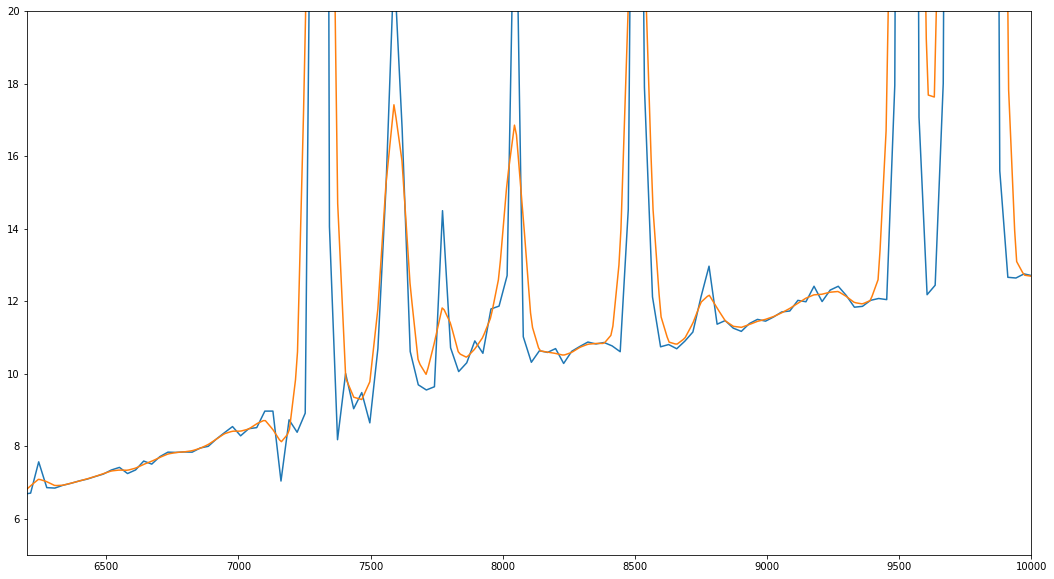

In [427]:
# plt.plot(file1['best_fit']['wavelength_rest'][:]*1e4*(1+file1['best_fit']['z'][6169]), file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][6169])
plt.plot(spectral_unit_wavelength,spectral_unit_flux[6169])
# plt.plot(wave_gi,lrf_gi[6169])
plt.plot(wave_gi,gif1(wave_gi))
# plt.scatter(wave_gi, lrf_gi[6169])
# plt.plot(spectral_unit_wavelength,convolve(spectral_unit_flux[6169],Gaussian1DKernel(1)))

plt.xlim(6200,10000)
plt.ylim(5,20)

In [569]:
dlambda

7.587274774774777

(0.0, 200.0)

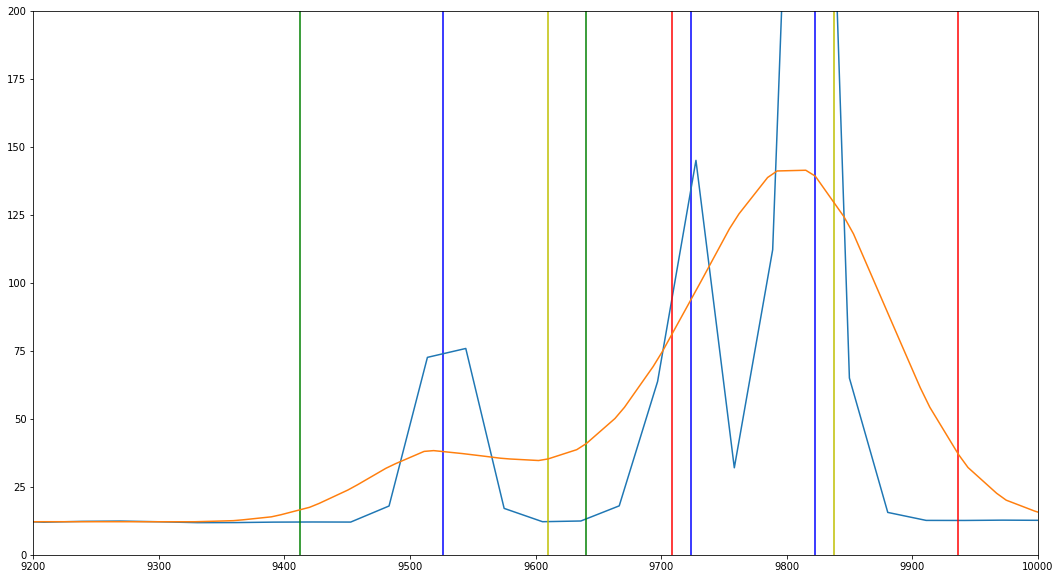

In [567]:
plt.axvline(wave_gi[(np.abs(wave_gi-9530)).argmin()],c='b')
plt.axvline(wave_gi[(np.abs(wave_gi-9725)).argmin()],c='b')
plt.axvline(wave_gi[(np.abs(wave_gi-9820)).argmin()],c='b')
plt.plot(spectral_unit_wavelength,spectral_unit_flux[6169])

plt.axvline(wave_gi[(np.abs(wave_gi-9530)).argmin()-15],c='g')
plt.axvline(wave_gi[(np.abs(wave_gi-9725)).argmin()-15],c='y')
plt.axvline(wave_gi[(np.abs(wave_gi-9820)).argmin()-15],c='r')
plt.axvline(wave_gi[(np.abs(wave_gi-9530)).argmin()+15],c='g')
plt.axvline(wave_gi[(np.abs(wave_gi-9725)).argmin()+15],c='y')
plt.axvline(wave_gi[(np.abs(wave_gi-9820)).argmin()+15],c='r')

plt.plot(wave_gi,lrf_gi[6169])
plt.xlim(9200,10000)
plt.ylim(0,200)

In [572]:
40*(wave_gv.max()-wave_gv.min())/len(wave_gv)

196.32624645209663

In [577]:
(np.abs(wave_gi-8100)).argmin()

276

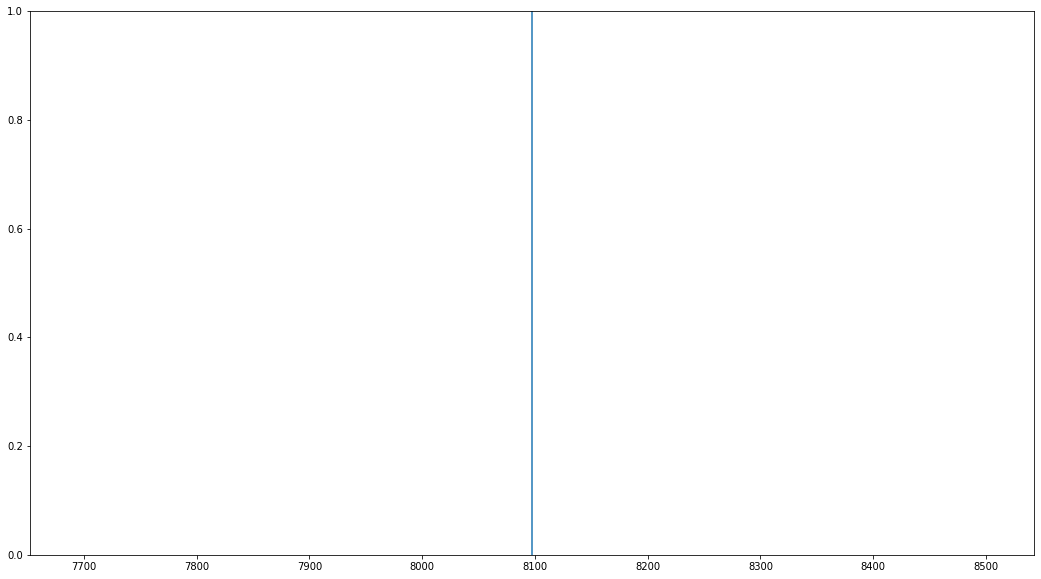

In [576]:
plt.axvline(wave_gi[(np.abs(wave_gi-8100)).argmin()])

In [ ]:
specRangeImg = []

for i in np.arange(1, lam_trace.shape[0] - 1):
    w = lam_trace[i]
    wave2pix_pos = wavePos_x_interp[i]

    if (bRange[0] <= w <= bRange[1]):
        thp_w = thp_i(w)
        deltW = np.abs(w - lam_trace[i - 1]) / 2 + np.abs(lam_trace[i + 1] - w) / 2
        f = spec_pix[wave2pix_pos]
        f_ratio = ratio_vec[wave2pix_pos] # to be computed spectrum over total spectrum
        if f_ratio==0: 
            f_ratio=1
        f = f / expt / thp_w / deltW / expnum / f_ratio # convert electrons to erg/s/m^2/A
        err = err2_pix[wave2pix_pos] # total electrons with bkg dark and read out noise
        # err = err/ t / deltW
        err = np.sqrt(err) / expt / deltW / thp_w / expnum /f_ratio # noise
        specRangeImg.append(wave2pix_pos)
        # err = err / thp_w 
    else:
        f = 0
        err = 0

    wave_flux[i] = f
    err_flux[i] = err
Aimg_cal = Aimg_[y_cent_pos-y_range:y_cent_pos+y_range+1, specRangeImg]


In [452]:
fphot = fnu2fphot(wave_gi,lrf_gi[6169]*1e-29)
dlambda = (wave_gi.max()-wave_gi.min())/len(wave_gi)
photon_per_res = fphot * colarea * expt * expnum * dlambda

In [463]:
fphot = fnu2fphot(wave_gi,gif1(wave_gi)*1e-29)
dlambda = (wave_gi.max()-wave_gi.min())/len(wave_gi)
photon_per_res = fphot * colarea * expt * expnum * dlambda

In [403]:
fphot = fnu2fphot(wave_gi,convolve(gif1(wave_gi)[6169],Gaussian1DKernel(5))*1e-29)
dlambda = (wave_gi.max()-wave_gi.min())/len(wave_gi)
photon_per_res = fphot * colarea * expt * expnum * dlambda

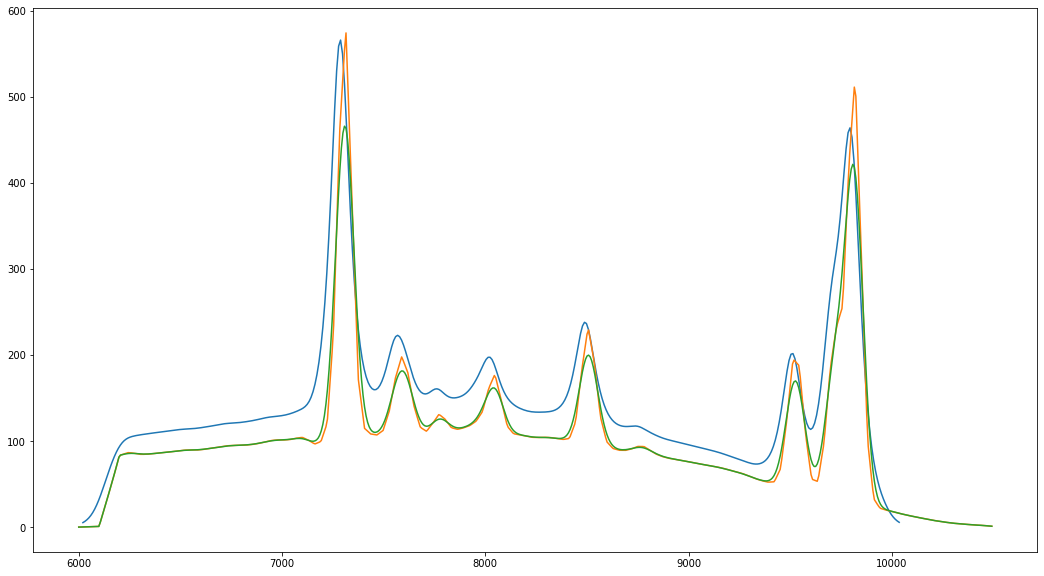

In [552]:
plt.plot(sls_wave,sls_flux) # defined at the end of this file
plt.plot(wave_gi,photon_per_res*gi_tp)
plt.plot(wave_gi,(lamshift_width(photon_per_res,gaussian(10,3.5)) *gi_tp))
# differences are the different value of dlambda!!!

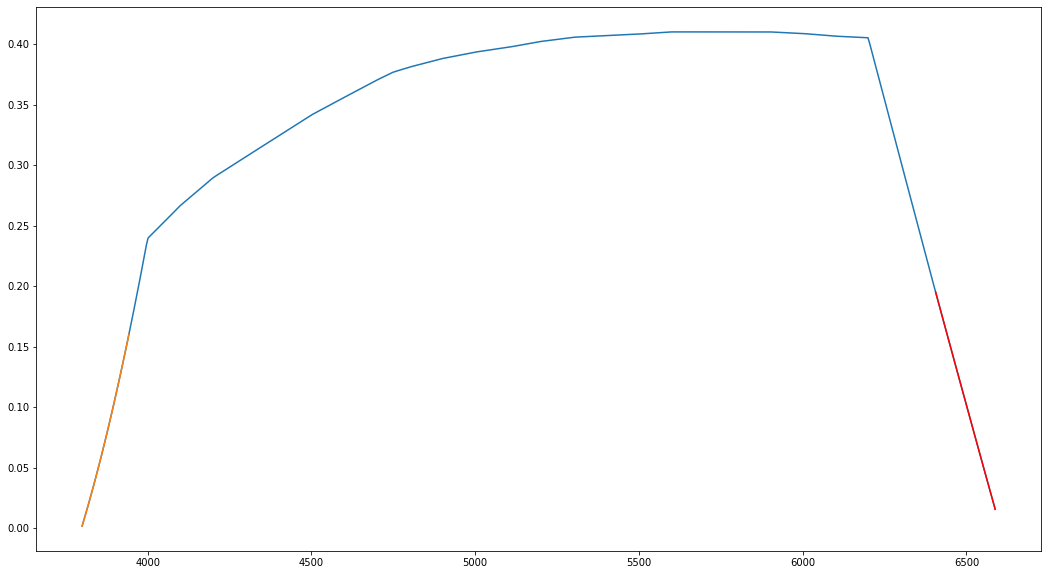

In [533]:
gv_tp = thp_gv(wave_gv) 
plt.plot(wave_gv,gv_tp)

plt.plot(wave_gv[0:30],gv_tp[0:30])
plt.plot(wave_gv[530:],gv_tp[530:],c='r')

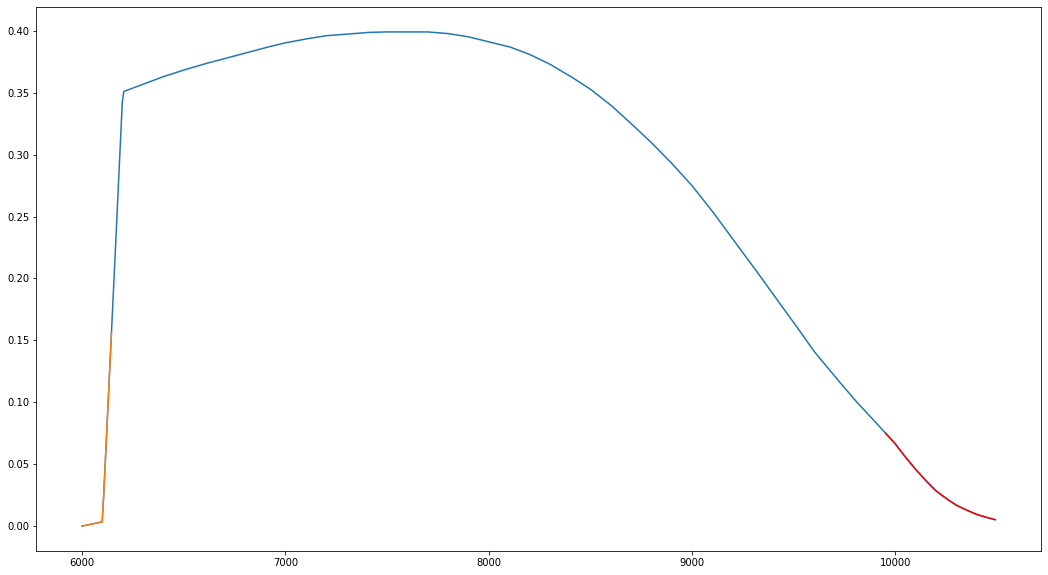

In [538]:
plt.plot(wave_gi,gi_tp)
plt.plot(wave_gi[0:20],gi_tp[0:20])
plt.plot(wave_gi[520:],gi_tp[520:],c='r')

In [142]:
gi_wave = []
gi_flux = []
for i in range(len(file1['best_fit']['wavelength_rest'][:])):
    if (GIwavemin <= file1['best_fit']['wavelength_rest'][i]*1e4*(1+file1['best_fit']['z'][6169]) <= GIwavemax):
        gi_wave.append(file1['best_fit']['wavelength_rest'][i]*1e4*(1+file1['best_fit']['z'][6169]))
        gi_flux.append(file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][6169][i])

In [143]:
len(gi_flux)

169

In [144]:
len(gi_wave)

169

In [145]:
giflux = np.interp(giwave, gi_wave, gi_flux)


0.960051


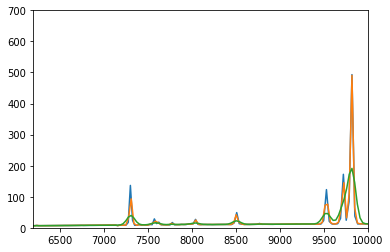

In [173]:
plt.plot(file1['best_fit']['wavelength_rest'][:]*1e4*(1+file1['best_fit']['z'][6169]),file1['best_fit']['spec_csp_sfh200_bc2003_hr_stelib_chab_neb_300r_i0100_2dal8[0,1]'][6169])
plt.plot(giwave,giflux)
plt.plot(giwave,convolve(giflux,Gaussian1DKernel(odd(giwave[10]/giR/2.35482)/8)))
plt.xlim(6200,10000)
plt.ylim(0,700)
print(file1['best_fit']['z'][6169])

(4800.0, 5100.0)

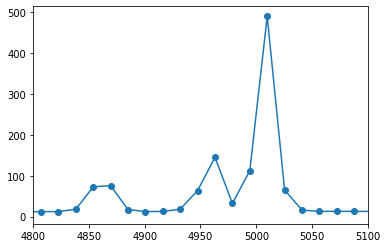

In [177]:
plt.plot(giwave/(1+file1['best_fit']['z'][6169]),giflux)
plt.scatter(giwave/(1+file1['best_fit']['z'][6169]),giflux)

# convolve(  ,Gaussian1DKernel(odd(giwave[0]/giR/2.35482)/8))
plt.xlim(4800,5100)

In [299]:
# 创建插值函数
gif = interp1d(giwave, giflux)

# 创建新的波长数组，长度为原来的四倍
new_wave = np.linspace(giwave[0], giwave[-1], len(giwave) * 4)

# 使用插值函数计算新的流量数组
new_flux = gif(new_wave)

In [540]:
100/dlambda

13.179962894248606

ValueError: x and y must be the same size

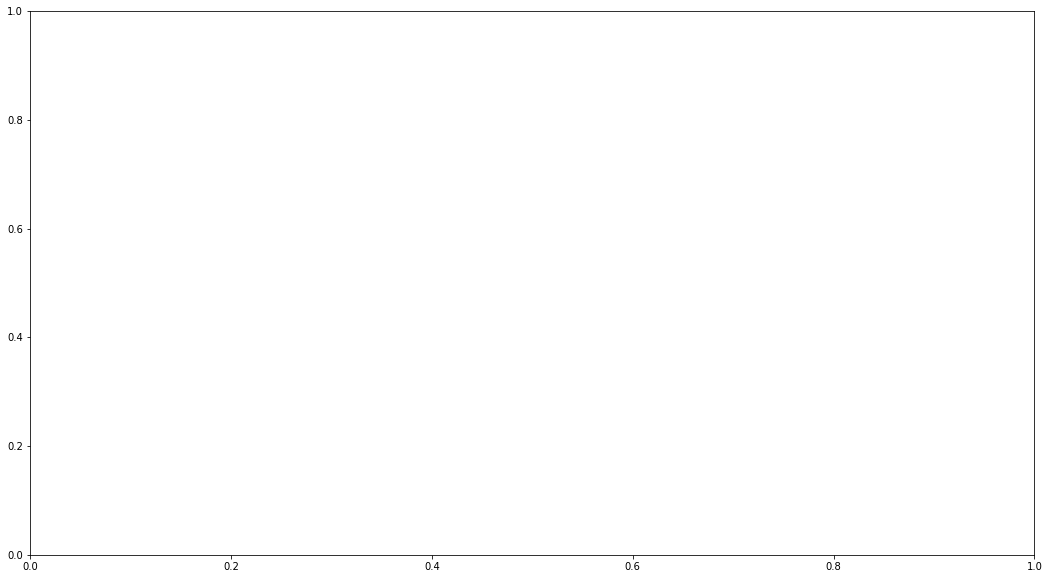

In [541]:
plt.scatter(new_wave,new_flux)
plt.scatter(new_wave,convolve(new_flux,Gaussian1DKernel(odd(new_wave[100]/giR)/8)))
plt.plot(giwave,giflux)


plt.xlim(9200,10000)

In [301]:
len(new_wave)

592

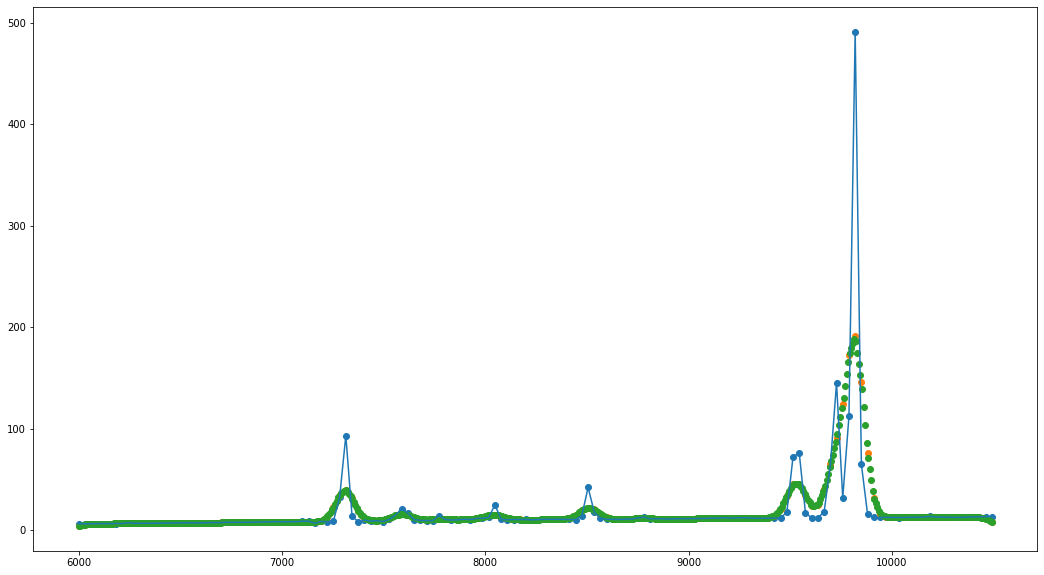

In [622]:
matplotlib.rcParams['figure.figsize'] = [18, 10]

plt.scatter(giwave,giflux)
plt.scatter(giwave,convolve(giflux,Gaussian1DKernel(odd(giwave[10]/giR/2.35482)/8)))
plt.plot(giwave,giflux)
# 创建插值函数
gif = interp1d(giwave, convolve(giflux,Gaussian1DKernel(odd(giwave[10]/giR/2.35482)/8)))

# 创建新的波长数组，长度为原来的四倍
new_wave = np.linspace(giwave[0], giwave[-1], len(giwave) * 4)

# 使用插值函数计算新的流量数组
new_flux = gif(new_wave)
plt.scatter(new_wave,new_flux)
# plt.xlim(9200,10000)

In [549]:
sls_wave = np.array([ 6020.54184646,  6030.21764763,  6039.8934488 ,  6049.56924997,
        6059.24505114,  6068.92085231,  6078.59665348,  6088.27245465,
        6097.94825583,  6107.624057  ,  6117.29985817,  6126.97565934,
        6136.65146051,  6146.32726168,  6156.00306285,  6165.67886402,
        6175.35466519,  6185.03046636,  6194.70626753,  6204.3820687 ,
        6214.05786987,  6223.73367104,  6233.40947221,  6243.08527338,
        6252.76107455,  6262.43687572,  6272.11267689,  6281.78847806,
        6291.46427923,  6301.1400804 ,  6310.81588157,  6320.49168274,
        6330.16748391,  6339.84328508,  6349.51908625,  6359.19488742,
        6368.87068859,  6378.54648976,  6388.22229094,  6397.89809211,
        6407.57389328,  6417.24969445,  6426.92549562,  6436.60129679,
        6446.27709796,  6455.95289913,  6465.6287003 ,  6475.30450147,
        6484.98030264,  6494.65610381,  6504.33190498,  6514.00770615,
        6523.68350732,  6533.35930849,  6543.03510966,  6552.71091083,
        6562.386712  ,  6572.06251317,  6581.73831434,  6591.41411551,
        6601.08991668,  6610.76571785,  6620.44151902,  6630.11732019,
        6639.79312136,  6649.46892253,  6659.1447237 ,  6668.82052487,
        6678.49632605,  6688.17212722,  6697.84792839,  6707.52372956,
        6717.19953073,  6726.8753319 ,  6736.55113307,  6746.22693424,
        6755.90273541,  6765.57853658,  6775.25433775,  6784.93013892,
        6794.60594009,  6804.28174126,  6813.95754243,  6823.6333436 ,
        6833.30914477,  6842.98494594,  6852.66074711,  6862.33654828,
        6872.01234945,  6881.68815062,  6891.36395179,  6901.03975296,
        6910.71555413,  6920.3913553 ,  6930.06715647,  6939.74295764,
        6949.41875881,  6959.09455998,  6968.77036116,  6978.44616233,
        6988.1219635 ,  6997.79776467,  7007.47356584,  7017.14936701,
        7026.82516818,  7036.50096935,  7046.17677052,  7055.85257169,
        7065.52837286,  7075.20417403,  7084.8799752 ,  7094.55577637,
        7104.23157754,  7113.90737871,  7123.58317988,  7133.25898105,
        7142.93478222,  7152.61058339,  7162.28638456,  7171.96218573,
        7181.6379869 ,  7191.31378807,  7200.98958924,  7210.66539041,
        7220.34119158,  7230.01699275,  7239.69279392,  7249.36859509,
        7259.04439627,  7268.72019744,  7278.39599861,  7288.07179978,
        7297.74760095,  7307.42340212,  7317.09920329,  7326.77500446,
        7336.45080563,  7346.1266068 ,  7355.80240797,  7365.47820914,
        7375.15401031,  7384.82981148,  7394.50561265,  7404.18141382,
        7413.85721499,  7423.53301616,  7433.20881733,  7442.8846185 ,
        7452.56041967,  7462.23622084,  7471.91202201,  7481.58782318,
        7491.26362435,  7500.93942552,  7510.61522669,  7520.29102786,
        7529.96682903,  7539.6426302 ,  7549.31843138,  7558.99423255,
        7568.67003372,  7578.34583489,  7588.02163606,  7597.69743723,
        7607.3732384 ,  7617.04903957,  7626.72484074,  7636.40064191,
        7646.07644308,  7655.75224425,  7665.42804542,  7675.10384659,
        7684.77964776,  7694.45544893,  7704.1312501 ,  7713.80705127,
        7723.48285244,  7733.15865361,  7742.83445478,  7752.51025595,
        7762.18605712,  7771.86185829,  7781.53765946,  7791.21346063,
        7800.8892618 ,  7810.56506297,  7820.24086414,  7829.91666531,
        7839.59246648,  7849.26826766,  7858.94406883,  7868.61987   ,
        7878.29567117,  7887.97147234,  7897.64727351,  7907.32307468,
        7916.99887585,  7926.67467702,  7936.35047819,  7946.02627936,
        7955.70208053,  7965.3778817 ,  7975.05368287,  7984.72948404,
        7994.40528521,  8004.08108638,  8013.75688755,  8023.43268872,
        8033.10848989,  8042.78429106,  8052.46009223,  8062.1358934 ,
        8071.81169457,  8081.48749574,  8091.16329691,  8100.83909808,
        8110.51489925,  8120.19070042,  8129.86650159,  8139.54230277,
        8149.21810394,  8158.89390511,  8168.56970628,  8178.24550745,
        8187.92130862,  8197.59710979,  8207.27291096,  8216.94871213,
        8226.6245133 ,  8236.30031447,  8245.97611564,  8255.65191681,
        8265.32771798,  8275.00351915,  8284.67932032,  8294.35512149,
        8304.03092266,  8313.70672383,  8323.382525  ,  8333.05832617,
        8342.73412734,  8352.40992851,  8362.08572968,  8371.76153085,
        8381.43733202,  8391.11313319,  8400.78893436,  8410.46473553,
        8420.1405367 ,  8429.81633788,  8439.49213905,  8449.16794022,
        8458.84374139,  8468.51954256,  8478.19534373,  8487.8711449 ,
        8497.54694607,  8507.22274724,  8516.89854841,  8526.57434958,
        8536.25015075,  8545.92595192,  8555.60175309,  8565.27755426,
        8574.95335543,  8584.6291566 ,  8594.30495777,  8603.98075894,
        8613.65656011,  8623.33236128,  8633.00816245,  8642.68396362,
        8652.35976479,  8662.03556596,  8671.71136713,  8681.3871683 ,
        8691.06296947,  8700.73877064,  8710.41457181,  8720.09037299,
        8729.76617416,  8739.44197533,  8749.1177765 ,  8758.79357767,
        8768.46937884,  8778.14518001,  8787.82098118,  8797.49678235,
        8807.17258352,  8816.84838469,  8826.52418586,  8836.19998703,
        8845.8757882 ,  8855.55158937,  8865.22739054,  8874.90319171,
        8884.57899288,  8894.25479405,  8903.93059522,  8913.60639639,
        8923.28219756,  8932.95799873,  8942.6337999 ,  8952.30960107,
        8961.98540224,  8971.66120341,  8981.33700458,  8991.01280575,
        9000.68860692,  9010.3644081 ,  9020.04020927,  9029.71601044,
        9039.39181161,  9049.06761278,  9058.74341395,  9068.41921512,
        9078.09501629,  9087.77081746,  9097.44661863,  9107.1224198 ,
        9116.79822097,  9126.47402214,  9136.14982331,  9145.82562448,
        9155.50142565,  9165.17722682,  9174.85302799,  9184.52882916,
        9194.20463033,  9203.8804315 ,  9213.55623267,  9223.23203384,
        9232.90783501,  9242.58363618,  9252.25943735,  9261.93523852,
        9271.61103969,  9281.28684086,  9290.96264203,  9300.63844321,
        9310.31424438,  9319.99004555,  9329.66584672,  9339.34164789,
        9349.01744906,  9358.69325023,  9368.3690514 ,  9378.04485257,
        9387.72065374,  9397.39645491,  9407.07225608,  9416.74805725,
        9426.42385842,  9436.09965959,  9445.77546076,  9455.45126193,
        9465.1270631 ,  9474.80286427,  9484.47866544,  9494.15446661,
        9503.83026778,  9513.50606895,  9523.18187012,  9532.85767129,
        9542.53347246,  9552.20927363,  9561.8850748 ,  9571.56087597,
        9581.23667714,  9590.91247832,  9600.58827949,  9610.26408066,
        9619.93988183,  9629.615683  ,  9639.29148417,  9648.96728534,
        9658.64308651,  9668.31888768,  9677.99468885,  9687.67049002,
        9697.34629119,  9707.02209236,  9716.69789353,  9726.3736947 ,
        9736.04949587,  9745.72529704,  9755.40109821,  9765.07689938,
        9774.75270055,  9784.42850172,  9794.10430289,  9803.78010406,
        9813.45590523,  9823.1317064 ,  9832.80750757,  9842.48330874,
        9852.15910991,  9861.83491108,  9871.51071225,  9881.18651342,
        9890.8623146 ,  9900.53811577,  9910.21391694,  9919.88971811,
        9929.56551928,  9939.24132045,  9948.91712162,  9958.59292279,
        9968.26872396,  9977.94452513,  9987.6203263 ,  9997.29612747,
       10006.97192864, 10016.64772981, 10026.32353098, 10035.99933215])

In [550]:
sls_flux = np.array([  5.20799733,   6.63761152,   8.43422727,  10.67945261,
        13.46096905,  16.86111833,  20.93859468,  25.70844819,
        31.13016366,  37.11042016,  43.51751674,  50.19814495,
        56.98945619,  63.72570161,  70.24301024,  76.38670837,
        82.02321411,  87.05310099,  91.41749463,  95.09404739,
        98.08997595, 100.4429138 , 102.226944  , 103.54865559,
       104.52649289, 105.26602391, 105.84731425, 106.32644696,
       106.7421377 , 107.12047887, 107.47734176, 107.82068566,
       108.15374084, 108.47795416, 108.79461469, 109.10520289,
       109.41126811, 109.71441121, 110.01638845, 110.31884358,
       110.62350781, 110.93157358, 111.2431356 , 111.55707706,
       111.87119119, 112.18223255, 112.48570483, 112.77582262,
       113.04618349, 113.29160229, 113.50949327, 113.69972496,
       113.8642755 , 114.00814397, 114.14123985, 114.27849925,
       114.43731518, 114.63247285, 114.87166035, 115.15436698,
       115.47331531, 115.8172863 , 116.17532833, 116.54141013,
       116.91657875, 117.30640474, 117.71527486, 118.14157357,
       118.5763277 , 119.00522988, 119.41191775, 119.78026011,
       120.09614336, 120.35089246, 120.54642282, 120.69785856,
       120.82954548, 120.96650209, 121.12757483, 121.32381692,
       121.55961667, 121.83355128, 122.13894559, 122.4677148 ,
       122.81600229, 123.18712541, 123.58844331, 124.02637238,
       124.50271724, 125.01250871, 125.54333246, 126.07633028,
       126.58971928, 127.06311329, 127.48136589, 127.83584234,
       128.12478466, 128.37418081, 128.61519117, 128.86882586,
       129.13835285, 129.45030886, 129.83537037, 130.3042853 ,
       130.85631636, 131.49112822, 132.20799905, 133.00571048,
       133.87943734, 134.82386251, 135.84583351, 136.98656303,
       138.34737853, 140.11130347, 142.5495073 , 146.00217556,
       150.83873615, 157.42406341, 166.12535266, 177.36439377,
       191.68111824, 209.76456649, 232.43427365, 260.56944545,
       294.96608712, 336.06041753, 383.41793807, 434.96712861,
       486.2189772 , 530.18425196, 558.80362237, 565.85707534,
       549.80020515, 514.49146312, 467.28111273, 415.95965875,
       366.51264704, 322.42455249, 285.07123972, 254.46206454,
       229.90472694, 210.46969954, 195.25998234, 183.5226825 ,
       174.65423546, 168.16592003, 163.66601713, 160.86663496,
       159.59660313, 159.79293064, 161.46993131, 164.66610319,
       169.39405697, 175.60696422, 183.1694913 , 191.79096868,
       200.90997225, 209.61761082, 216.77010136, 221.33860403,
       222.80263876, 221.26772279, 217.28363046, 211.50481679,
       204.49425463, 196.70702109, 188.62571333, 180.79059633,
       173.68442375, 167.62632075, 162.75953776, 159.09750125,
       156.58578307, 155.14438591, 154.68086944, 155.08115415,
       156.175307  , 157.69557002, 159.2476166 , 160.36272885,
       160.64402902, 159.93975202, 158.41008707, 156.43261682,
       154.42065928, 152.68158438, 151.37458901, 150.54099383,
       150.15081358, 150.13631341, 150.42508609, 150.96706727,
       151.75619327, 152.82531285, 154.23385829, 156.04391584,
       158.29595762, 160.9969083 , 164.12598385, 167.66185789,
       171.60637205, 175.97951887, 180.76415407, 185.80937403,
       190.72423363, 194.83261017, 197.28041121, 197.32291472,
       194.66819652, 189.64820667, 183.08348259, 175.94330999,
       169.02757084, 162.82526907, 157.53337929, 153.15296631,
       149.58204166, 146.68127676, 144.3119981 , 142.35620627,
       140.72230807, 139.34405227, 138.17190891, 137.1663998 ,
       136.29518967, 135.54199789, 134.90835817, 134.40391784,
       134.03103586, 133.77783546, 133.62302142, 133.54328058,
       133.51976215, 133.54063843, 133.60210753, 133.70951176,
       133.87926045, 134.1387568 , 134.53015668, 135.11081726,
       135.95504541, 137.14609914, 138.78135821, 140.97877353,
       143.88935793, 147.70166606, 152.63979509, 158.94610552,
       166.8414801 , 176.45564316, 187.72124416, 200.23215832,
       213.09660228, 224.87244303, 233.73157575, 237.94198131,
       236.52409881, 229.69849247, 218.79628679, 205.68196867,
       192.08084492, 179.18510568, 167.61795261, 157.59656903,
       149.11239778, 142.04955924, 136.2463943 , 131.52802475,
       127.72701025, 124.69575386, 122.31064688, 120.46981983,
       119.08845534, 118.09490031, 117.42837388, 117.03746301,
       116.87753334, 116.90498486, 117.06644672, 117.28509486,
       117.45296658, 117.44265061, 117.14235778, 116.49959678,
       115.54371148, 114.36567003, 113.0758759 , 111.76490208,
       110.49011554, 109.27411878, 108.11856577, 107.01977396,
       105.97926865, 105.00379013, 104.10022531, 103.27293922,
       102.52143615, 101.83887778, 101.21216135, 100.62337511,
       100.05325966,  99.48565872,  98.91112172,  98.32766911,
        97.73903016,  97.15152574,  96.57112285,  96.00139415,
        95.44261996,  94.89218568,  94.34606797,  93.80062647,
        93.25379524,  92.7060055 ,  92.15939536,  91.61639125,
        91.07636189,  90.5343964 ,  89.98213864,  89.41178487,
        88.81962988,  88.20655588,  87.57412449,  86.91975268,
        86.23470112,  85.5097171 ,  84.74714924,  83.96274898,
        83.17941723,  82.41299838,  81.66067587,  80.90951363,
        80.14005823,  79.3403224 ,  78.50761771,  77.65142964,
        76.79098668,  75.95157489,  75.16294619,  74.45914048,
        73.87824784,  73.46155644,  73.25291086,  73.29977771,
        73.65593919,  74.3878388 ,  75.58465134,  77.35949386,
        79.85575914,  83.2470279 ,  87.74277841,  93.59169577,
       101.06395001, 110.41903309, 121.83014354, 135.27827745,
       150.4024675 , 166.30339449, 181.42551308, 193.66644479,
       200.86672847, 201.57667808, 195.66853781, 184.43944829,
       170.09278857, 154.97237751, 140.96862398, 129.31111628,
       120.66788787, 115.35536383, 113.5233015 , 115.27358722,
       120.71580922, 129.96755741, 143.10203619, 160.04169311,
       180.39902944, 203.29815485, 227.29164668, 250.55582029,
       271.45520389, 289.29919577, 304.84199258, 320.12456356,
       337.64253736, 359.22315823, 385.0657812 , 413.19528461,
       439.45183325, 458.20340829, 463.89008055, 453.01762694,
       425.62045255, 385.28621678, 337.69472523, 288.57594553,
       242.22938288, 201.06578881, 165.93949495, 136.72648037,
       112.81354606,  93.4089575 ,  77.71028763,  64.98345102,
        54.59173011,  46.00019342,  38.77213843,  32.56783929,
        27.14916344,  22.37909742,  18.20106314,  14.60623029,
        11.5863822 ,   9.11205143,   7.12667585,   5.55395682])

In [626]:
np.trapz(lrf_gi[6169]*gi_tp, wave_gi)

17812.467600713815

In [629]:
import sys
sys.path.append('/Users/rain/emulator/emulator_v0.7/')
import utils

In [635]:
utils.fnu2mAB((lrf_gi[6169]*1e-29).mean())

20.74156749292947

In [632]:
np.trapz(utils.fnu2flam(wave_gi,lrf_gi[6169]*1e-29)*gi_tp, wave_gi)

8.24187526600064e-15

In [ ]:
utils.fnu2flam(wave_gi,lrf_gi[6169]*1e-29)